In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [7]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
df.shape

(200, 6)

In [10]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [12]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['BP'] = encoder.fit_transform(df['BP'])
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'])
df.sample(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
93,42,0,1,1,29.271,drugY
183,36,0,0,1,15.490,drugY
88,37,0,0,1,23.091,drugY


In [14]:
X = df.drop('Drug', axis=1)
X[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [17]:
X = np.asanyarray(X)
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [18]:
y = df['Drug']
y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=9)

In [21]:
Tree_model = DecisionTreeClassifier()
Tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_predict = Tree_model.predict(X_test)

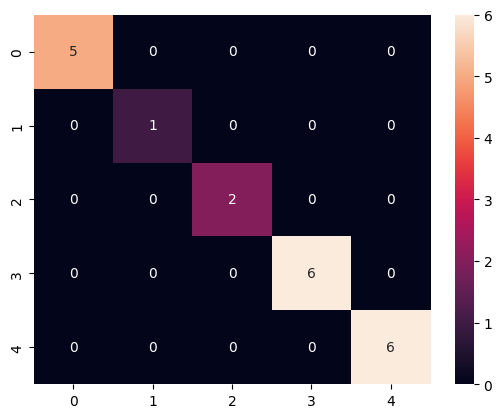

In [26]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [27]:
accuracy_score(y_test, y_predict)

1.0

In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         6
       drugY       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



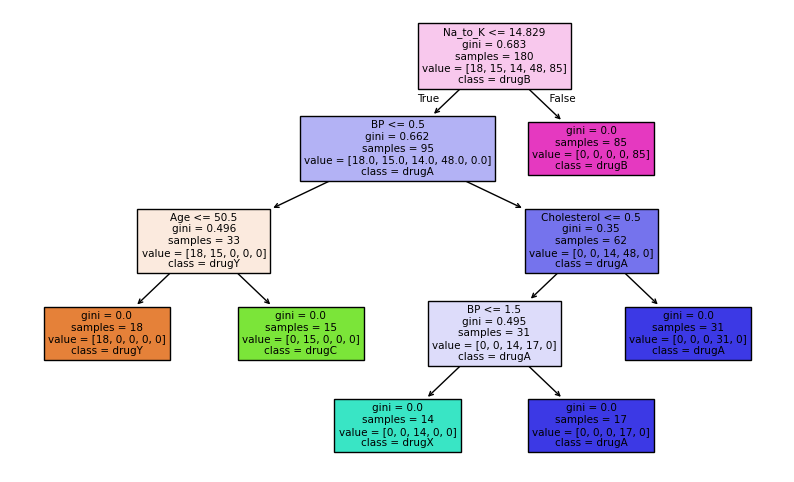

In [34]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(10,6))
tree.plot_tree(Tree_model, filled=True, feature_names=cols, class_names=classes)
plt.show()

DecisionTrees's Accuracy:  0.9


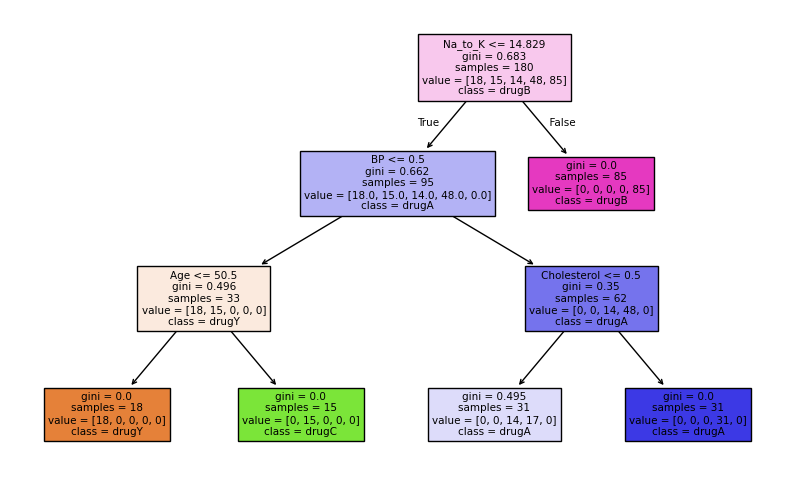

In [37]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,6))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.9


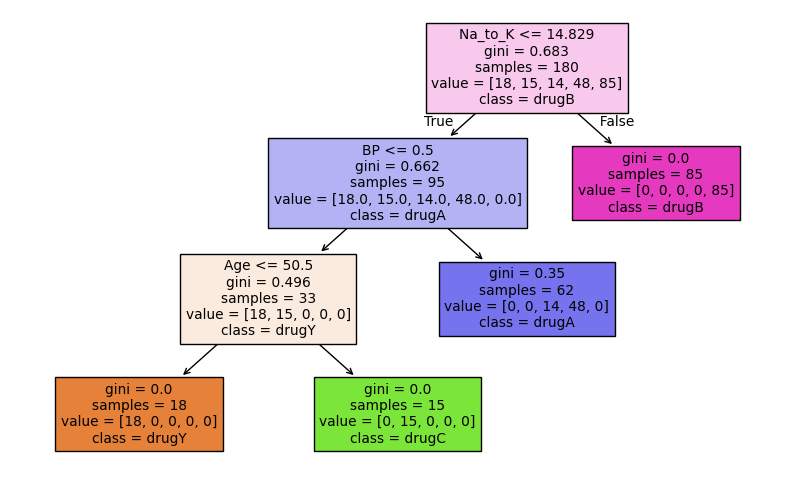

In [43]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.05, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,6))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [44]:
RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)
y_predict2 = RF_model.predict(X_test)

In [46]:
print(accuracy_score(y_test, y_predict2))
print(classification_report(y_test, y_predict2))

1.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         6
       drugY       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [48]:
predict = cross_val_predict(estimator = Tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200

